In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import math
import pathlib

In [28]:
pip install corner

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
binaries = Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Binaries_with_MCP_time")
files = list(binaries.iterdir())
print(files[0])

for file in files:
    unique_value = file.stem.split("_")[-1]
    print(unique_value)

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_107.bin
107
34
41
48
58
68
78
87
97
22
30
38
46
54
62
102
61
71
81
92
46
62
64
74
85
96
28
38
48
58
67
75
77
88
55
64
78
38
48
57
67
77
48
57
67
31
42
52
63
41
52
94
100
49
57
66
74
83
91
106
52
61
70
79
88
97
19
26
33
40
47
54
102
55
64
74
83
93
27
34
41
48
55


In [3]:
# #binaries = Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Data2")
# binaries = Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/new_pdt/Binaries_with_MCP_time")
# files = list(binaries.iterdir())

# #print(files[0])

# for file in files:
#     print(file)
#     testsite_array = []

#     #Read the file
#     with open(file, 'br') as f:
#         buffer = f.read()
#         f.close()
#         print("Length of buffer is %d" % len(buffer))

#     #Find the size
#     size = str(int(len(buffer) / 8)) + 'd'

#     #Unpack the data
#     data = struct.unpack(size, buffer)

#     #test the heading
#     testsite_array.append(data[0:9])
#     print(testsite_array)

#     #Find total nbr of signals on each file
#     number_of_signals = int((len(buffer) - 9 * 8) / (8 * 2001))
#     x = np.array([data[i * 2001 + 9:(i + 1) * 2001 + 9] for i in range(number_of_signals)])

#     # Compute the maximum value for each signal in x
#     max_values = np.max(x, axis=1)

#     # Compute the maximum value among all elements in x
#     global_max_value = np.max(x)

#     # Create a histogram of the max values
    
# #     num_bins = 50
# #     plt.hist(max_values, bins=num_bins)
# #     plt.xlabel('Max value')
# #     plt.ylabel('Frequency')
# #     plt.title('Histogram of max values in signals')
# #     plt.show()

# #     print("Max value among all elements in x:", global_max_value)

# #     # Plot the first signal
# #     y = x[0]
# #     print("Max value of first signal:", np.max(y))
# #     plt.plot(np.arange(0, 2001), y, color="red")
# #     plt.show()
#     print()

In [4]:
for i in range(10):
    print(np.random.randint(-5,6,1))

[-1]
[-1]
[-3]
[0]
[-3]
[-4]
[5]
[-1]
[4]
[0]


In [5]:
binaries = Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Binaries_with_MCP_time")
files = list(binaries.iterdir())



n = 0
for file in files:
    testsite_array = []
    
    #Read the file
    with open(file, 'br') as f:
        buffer = f.read()
        f.close()

    #Find the size
    size = str(int(len(buffer) / 8)) + 'd'

    #Unpack the data
    data = struct.unpack(size, buffer)

    #test the heading
    testsite_array.append(data[0:9])
    #     print(testsite_array)

    #Find total nbr of signals on each file
    number_of_signals = int((len(buffer) - 9 * 8) / (8 * 2001))
    x = np.array([data[i * 2001 + 9:(i + 1) * 2001 + 9] for i in range(number_of_signals)])
    


#     print(data[0:9])

    unique_value = file.stem.split("_")[-1]
    print(unique_value)
    
    zero = np.full(x.shape[0],data[0])
    one = np.full(x.shape[0],data[1])
    two = np.full(x.shape[0],data[2])
    three = np.full(x.shape[0],int(unique_value))
    four = np.full(x.shape[0],data[4])
    five = np.full(x.shape[0],data[5])
    six = np.full(x.shape[0],data[6])
    seven = np.full(x.shape[0],data[7])
    eight = np.full(x.shape[0],data[8]) - 10.531742530532568 # - Delay Due to Machinery
    
    print(file, data[3])
    
    labels = {'Flight_Path':zero,'Flight_Path_U':one,'A':two,'Z':three,'E':four,'E_U':five,'ToF':six,'ToF_U':seven,'PDT':eight}
    df1 = pd.DataFrame(labels)
    df2 = pd.DataFrame(x)
    df = pd.concat((df1,df2), axis=1)
    
    first = len(df)
#     Filter out rows based on criteria
    filtered_indices = np.where(df.iloc[:, 9] <= 510)[0]
    df_filtered = df.iloc[filtered_indices]

    # Reset the index of the filtered DataFrame
    df_filtered = df_filtered.reset_index(drop=True)
    
    second = len(df_filtered)
    
    third = first-second
    print(third)
    n += third
    
    # Save the filtered DataFrame to a new file
    path_label = Path(f'C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Unnormalized/M{math.floor(data[2])}_E{math.floor(data[4])}.df')
    df_filtered.to_hdf(path_label, key='data.df', mode='w')


107
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_107.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


34
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_34.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


41
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_41.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


48
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_48.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


58
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_58.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


68
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_68.bin 40.0
1


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


78
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_78.bin 40.0
1


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


87
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_87.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


97
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_100_Energy_97.bin 40.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


22
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_104_Energy_22.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


30
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_104_Energy_30.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


38
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_104_Energy_38.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


46
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_104_Energy_46.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


54
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_104_Energy_54.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


62
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_104_Energy_62.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


102
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_105_Energy_102.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


61
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_105_Energy_61.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


71
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_105_Energy_71.bin 42.0
1


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


81
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_105_Energy_81.bin 42.0
2


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


92
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_105_Energy_92.bin 42.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

46
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_110_Energy_46.bin 44.0
0
62
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_110_Energy_62.bin 44.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


64
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_110_Energy_64.bin 44.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


74
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_110_Energy_74.bin 44.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


85
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_110_Energy_85.bin 44.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

96
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_110_Energy_96.bin 44.0
0
28
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_28.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


38
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_38.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


48
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_48.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


58
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_58.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


67
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_67.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


75
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_75.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


77
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_77.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


88
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_130_Energy_88.bin 51.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


55
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_133_Energy_55.bin 52.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


64
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_133_Energy_64.bin 52.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


78
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_135_Energy_78.bin 53.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


38
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_136_Energy_38.bin 53.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


48
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_136_Energy_48.bin 53.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


57
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_136_Energy_57.bin 53.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


67
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_136_Energy_67.bin 53.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


77
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_136_Energy_77.bin 53.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


48
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_140_Energy_48.bin 55.0
1


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


57
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_140_Energy_57.bin 55.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


67
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_140_Energy_67.bin 55.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


31
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_143_Energy_31.bin 56.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


42
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_143_Energy_42.bin 56.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


52
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_143_Energy_52.bin 56.0
1


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


63
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_143_Energy_63.bin 56.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


41
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_149_Energy_41.bin 58.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


52
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_149_Energy_52.bin 58.0
0
94
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_80_Energy_94.bin 32.0
0
100
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_100.bin 34.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

49
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_49.bin 34.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


57
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_57.bin 34.0
0
66
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_66.bin 34.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

74
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_74.bin 34.0
0
83
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_83.bin 34.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

91
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_85_Energy_91.bin 34.0
0
106
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_106.bin 36.0
0
52
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_52.bin 36.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


61
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_61.bin 36.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


70
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_70.bin 36.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


79
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_79.bin 36.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


88
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_88.bin 36.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


97
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_90_Energy_97.bin 36.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


19
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_91_Energy_19.bin 37.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


26
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_91_Energy_26.bin 37.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


33
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_91_Energy_33.bin 37.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


40
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_91_Energy_40.bin 37.0
0
47
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_91_Energy_47.bin 37.0
0
54
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_91_Energy_54.bin 37.0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


102
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_95_Energy_102.bin 38.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


55
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_95_Energy_55.bin 38.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


64
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_95_Energy_64.bin 38.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


74
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_95_Energy_74.bin 38.0
1


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


83
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_95_Energy_83.bin 38.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


93
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_95_Energy_93.bin 38.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


27
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_97_Energy_27.bin 39.0
0
34
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_97_Energy_34.bin 39.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

41
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_97_Energy_41.bin 39.0
0
48
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_97_Energy_48.bin 39.0
0


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')
C:\Users\steve\anaconda3\env

55
C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Binaries_with_MCP_time\Mass_97_Energy_55.bin 39.0
0


C:\Users\steve\AppData\Local\Temp\ipykernel_9952\2776473324.py:69: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  df_filtered.to_hdf(path_label, key='data.df', mode='w')


In [6]:
binaries = pathlib.Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Unnormalized")
files = list(binaries.iterdir())
print(len(files))

# Load the labels from the dataset
ToF_labels = []
MCP_labels = []
all_labels = []

for file_id in files:
    signal_filename = file_id
    df = pd.read_hdf(signal_filename, key=None)
    labels1 = df.iloc[:, 9].values
    labels2 = df['ToF'].values
    labels = labels1 + labels2
    ToF_labels.extend(labels2)
    MCP_labels.extend(labels1)

# Calculate the global max_value
max_value_Tof = np.max(ToF_labels)
max_value_MCP = np.max(MCP_labels)

print()
print(max_value_Tof)
print(max_value_MCP)
print()

for i in range(len(MCP_labels)):
    if MCP_labels[i] > 510:
        print(MCP_labels[i])


83

5.9638392012689705
502.0511474609375



In [7]:
for i in range(1000):
    print(MCP_labels[i])

499.1996765136719
499.86334228515625
499.6213073730469
499.4953308105469
499.583984375
500.01922607421875
499.61114501953125
499.724853515625
500.0267639160156
499.9145202636719
499.4835205078125
500.33905029296875
500.1004638671875
499.2405700683594
499.52197265625
499.2992858886719
500.04718017578125
499.39862060546875
500.1907958984375
499.4044494628906
500.10113525390625
499.7311096191406
500.1535949707031
499.0953674316406
500.2926330566406
500.06463623046875
499.3586730957031
499.5546875
499.795654296875
499.177734375
499.1896667480469
499.7979736328125
499.2896728515625
499.5707702636719
499.3817443847656
499.05670166015625
499.4255676269531
500.0283508300781
499.8524169921875
499.8545227050781
499.8123779296875
499.2495422363281
499.430419921875
499.4769592285156
499.3479919433594
498.84173583984375
499.9529724121094
499.712646484375
500.350341796875
500.1263122558594
499.3423156738281
498.5624694824219
500.1889953613281
499.15997314453125
499.48809814453125
499.5160827636719
4

In [3]:
binaries = pathlib.Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Unnormalized")
files = list(binaries.iterdir())

reading_files = pd.read_hdf(files[0], key=None, mode='r')


for file in files:
    reading_files = pd.read_hdf(file, key=None, mode='r')
    print(file)
    print(reading_files)
    print()


C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M100_E107.df
     Flight_Path  Flight_Path_U      A    Z           E       E_U       ToF  \
0      38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
1      38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
2      38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
3      38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
4      38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
..           ...            ...    ...  ...         ...       ...       ...   
571    38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
572    38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
573    38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
574    38.751778       1.092081  100.0  107  107.881609  0.452286  2.685791   
575    38.751778       1.092081  100.0 

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M100_E58.df
       Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0        38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
1        38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
2        38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
3        38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
4        38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
...            ...            ...    ...  ..        ...       ...       ...   
15715    38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
15716    38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
15717    38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
15718    38.751778       1.092081  100.0  58  58.242742  0.417016  3.655317   
15719    38.751778       1.092081  100.0

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M100_E87.df
      Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0       38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
1       38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
2       38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
3       38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
4       38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
...           ...            ...    ...  ..        ...       ...       ...   
4842    38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
4843    38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
4844    38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
4845    38.751778       1.092081  100.0  87  87.998468  0.443464  2.973777   
4846    38.751778       1.092081  100.0  87  87.998

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M104_E30.df
      Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0       38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
1       38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
2       38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
3       38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
4       38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
...           ...            ...    ...  ..        ...       ...       ...   
8166    38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
8167    38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
8168    38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
8169    38.751778       1.092081  104.0  30  30.594686  0.361971  5.143274   
8170    38.751778       1.092081  104.0  30  30.594

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M104_E54.df
      Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0       38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
1       38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
2       38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
3       38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
4       38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
...           ...            ...    ...  ..        ...       ...       ...   
2831    38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
2832    38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
2833    38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
2834    38.751778       1.092081  104.0  54  54.232439  0.426755  3.863075   
2835    38.751778       1.092081  104.0  54  54.232

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M105_E61.df
       Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0        38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
1        38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
2        38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
3        38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
4        38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
...            ...            ...    ...  ..        ...       ...       ...   
15092    38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
15093    38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
15094    38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
15095    38.751778       1.092081  105.0  61  61.160832  0.436184  3.655139   
15096    38.751778       1.092081  105.0

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M110_E62.df
     Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0      38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
1      38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
2      38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
3      38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
4      38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
..           ...            ...    ...  ..        ...       ...       ...   
609    38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
610    38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
611    38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
612    38.751778       1.092081  110.0  62  62.891616  0.454063  3.689317   
613    38.751778       1.092081  110.0  62  62.891616  0.45406

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M110_E96.df
     Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0      38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
1      38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
2      38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
3      38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
4      38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
..           ...            ...    ...  ..        ...       ...       ...   
364    38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
365    38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
366    38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
367    38.751778       1.092081  110.0  96  96.802231  0.486402  2.973717   
368    38.751778       1.092081  110.0  96  96.802231  0.48640

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M130_E48.df
       Flight_Path  Flight_Path_U      A   Z          E      E_U       ToF  \
0        38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
1        38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
2        38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
3        38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
4        38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
...            ...            ...    ...  ..        ...      ...       ...   
12559    38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
12560    38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
12561    38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
12562    38.751778       1.092081  130.0  48  48.153989  0.46339  4.583545   
12563    38.751778       1.092081  130.0  48  48.15

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M130_E75.df
      Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0       38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
1       38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
2       38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
3       38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
4       38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
...           ...            ...    ...  ..        ...       ...       ...   
7115    38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
7116    38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
7117    38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
7118    38.751778       1.092081  130.0  75  75.795842  0.520901  3.653381   
7119    38.751778       1.092081  130.0  75  75.795

C:\Users\steve\OneDrive\Bureaublad\Studies\Thesis\Data\Detector99\Unnormalized\M133_E55.df
      Flight_Path  Flight_Path_U      A   Z          E       E_U       ToF  \
0       38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
1       38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
2       38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
3       38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
4       38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
...           ...            ...    ...  ..        ...       ...       ...   
8261    38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
8262    38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
8263    38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
8264    38.751778       1.092081  133.0  55  55.133527  0.485816  4.332753   
8265    38.751778       1.092081  133.0  55  55.133

KeyboardInterrupt: 

In [10]:
binaries = pathlib.Path("C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Unnormalized/")
files = list(binaries.iterdir())

Range = int(len(files))

def cutting(number_of_cuts):
    
    number = 1/number_of_cuts
    arange = np.arange(0,1+number,number)
    
    
    for i in range(Range):
        print(i)
        reading_files = pd.read_hdf(files[i], key=None, mode='r')
        
        array = arange*len(reading_files)
        array = np.round(array)
        
        
        for j in range(number_of_cuts):
            
#             print(array[j],array[j+1])
            
            df_file = reading_files[int(array[j]):int(array[j+1])]
            
            if i == 0:
                path = pathlib.Path(f'C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Filtered/{j+1}.h5')
                df_file.to_hdf(path, key='data.df', mode='w', format='table') 
        

            else:
                path = pathlib.Path(f'C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Filtered/{j+1}.h5')
                df_file.to_hdf(path, key='data.df', format='table', append=True) 

    
cutting(40)


C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\steve\anaconda3\envs\tf_gpu\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'data.df'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` 

[498.64697266 498.3109436  498.99835205 ... 498.95849609 498.65615845
 498.30609131]
Problem with:
100.0 108


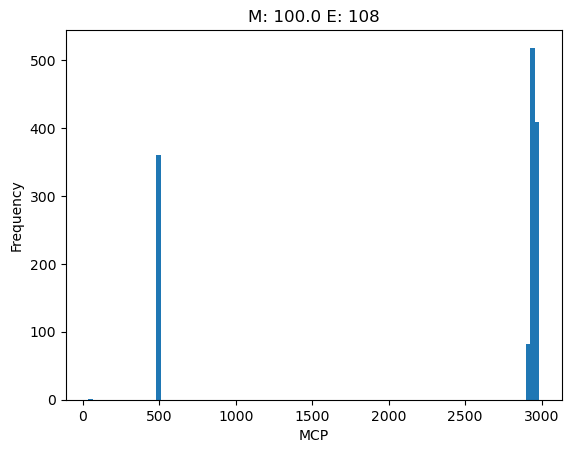

Problem with:
110.0 31


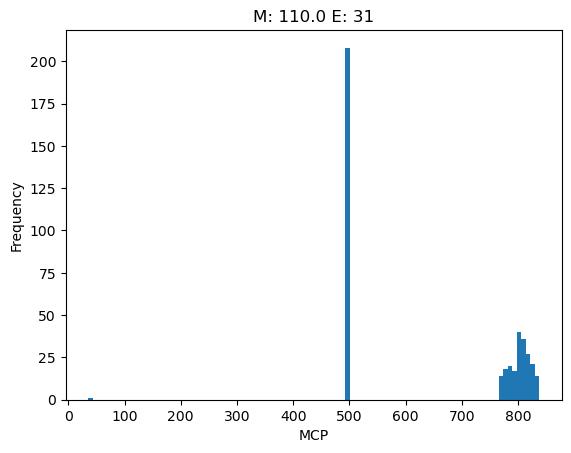

Problem with:
136.0 38


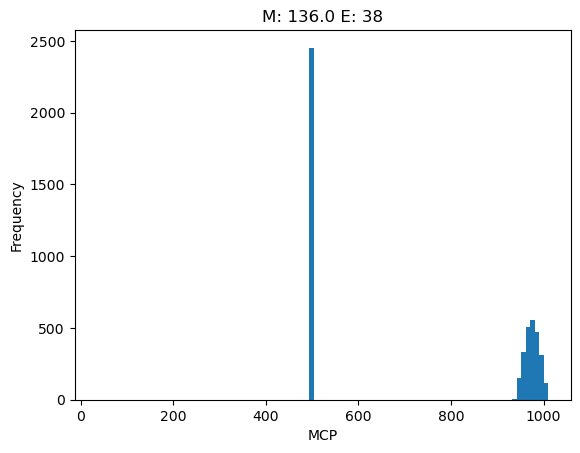

Problem with:
149.0 42


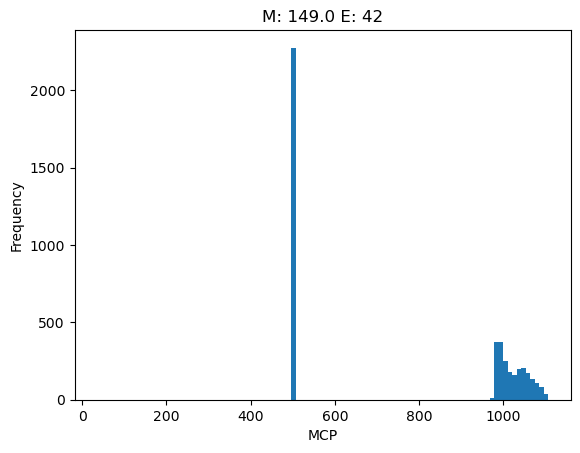

Problem with:
80.0 94


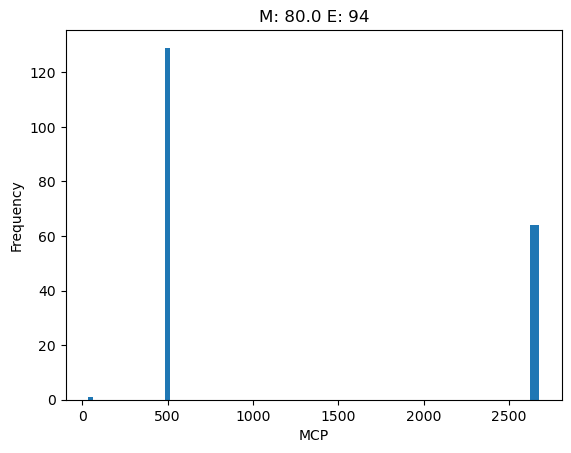

Problem with:
85.0 100


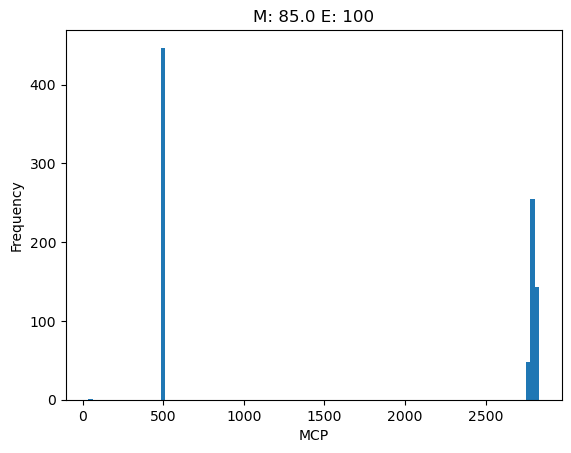

Problem with:
90.0 106


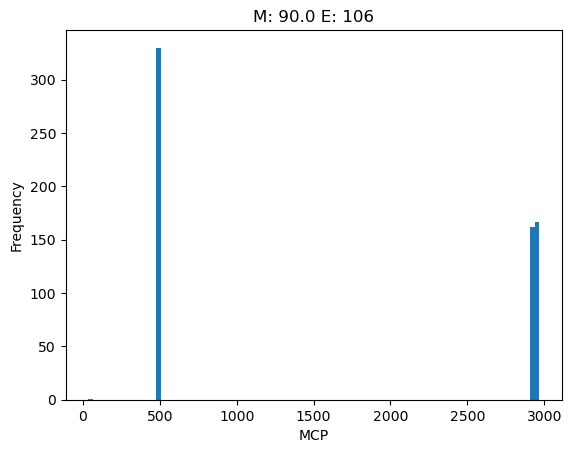

Problem with:
97.0 27


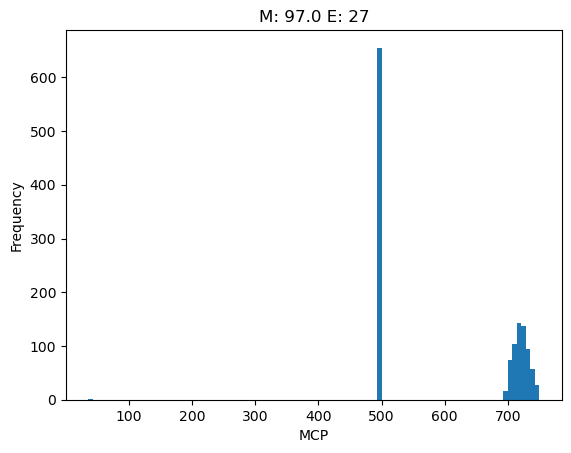

In [56]:
binaries = pathlib.Path(f'C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector92/Unnormalized')
files = list(binaries.iterdir())


df= pd.read_hdf(files[1], key=None, mode='r')
print(df[df.columns[9]].values)

for file in files:
    df= pd.read_hdf(file, key=None, mode='r')
    
    for i in range(len(df)):
        if df[df.columns[9]].values[i] > 510:
            print("Problem with:")
            print(df['A'].values[0],df['Z'].values[0])
            
            
            
            plt.hist(df[df.columns[9]].values, bins=100)
            plt.title(f'M: {df["A"].values[0]} E: {df["Z"].values[0]}' )
            plt.xlabel("MCP")
            plt.ylabel("Frequency")
            plt.show()
            break

    



[ 4.99468109e+02  4.34000000e+00  1.34000000e+00 ...  2.68834000e+03
  2.68834000e+03 -1.00000000e+00]


,Flight_Path,Flight_Path_U,A,Z,E,E_U,ToF,ToF_U,PDT,0,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
331,38.751778,1.092081,100.0,107,107.881609,0.452286,2.685791,0.075899,-1.320156,499.468109,...,2691.340000,2687.340000,2689.340000,2687.340000,2689.340000,2688.340000,2690.340000,2688.340000,2688.340000,-1.0
332,38.751778,1.092081,100.0,107,107.881609,0.452286,2.685791,0.075899,-1.320156,500.053375,...,2693.646667,2688.646667,2693.646667,2691.646667,2694.646667,2688.646667,2694.646667,2687.646667,2691.646667,-1.0
333,38.751778,1.092081,100.0,107,107.881609,0.452286,2.685791,0.075899,-1.320156,499.340302,...,2676.953333,2679.953333,2679.953333,2678.953333,2676.953333,2682.953333,2678.953333,2679.953333,2677.953333,-1.0
334,38.751778,1.092081,100.0,107,107.881609,0.452286,2.685791,0.075899,-1.320156,499.056213,...,2702.183333,2702.183333,2698.183333,2702.183333,2701.183333,2702.183333,2699.183333,2704.183333,2701.183333,-1.0
335,38.751778,1.092081,100.0,107,107.881609,0.452286,2.685791,0.075899,-1.320156,500.134277,...,2680.516667,2683.516667,2682.516667,2683.516667,2683.516667,2684.516667,2679.516667,2684.516667,2682.516667,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,38.751778,1.092081,97.0,55,55.394876,0.406554,3.691451,0.104909,-2.118572,499.293488,...,1370.440000,1367.440000,1371.440000,1368.440000,1369.440000,1368.440000,1368.440000,1371.440000,1370.440000,-1.0
670,38.751778,1.092081,97.0,55,55.394876,0.406554,3.691451,0.104909,-2.118572,499.275482,...,1396.716667,1396.716667,1399.716667,1396.716667,1397.716667,1395.716667,1396.716667,1396.716667,1395.716667,-1.0
671,38.751778,1.092081,97.0,55,55.394876,0.406554,3.691451,0.104909,-2.118572,499.479340,...,1387.230000,1385.230000,1386.230000,1386.230000,1387.230000,1384.230000,1385.230000,1385.230000,1388.230000,-1.0
672,38.751778,1.092081,97.0,55,55.394876,0.406554,3.691451,0.104909,-2.118572,500.134430,...,1363.376667,1364.376667,1364.376667,1365.376667,1364.376667,1366.376667,1362.376667,1364.376667,1364.376667,-1.0


[-9.23333333e-01  1.07666667e+00  1.07666667e+00 ...  9.27076667e+02
  9.26076667e+02 -1.00000000e+00]


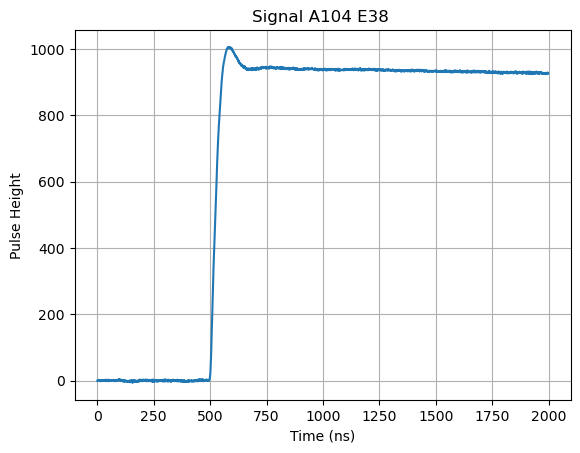

1006.0766666666666


In [15]:


binaries = pathlib.Path(f'C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector99/Filtered/')
# binaries = pathlib.Path(f'C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector97/Filtered/Processed/')

files = list(binaries.iterdir())

df= pd.read_hdf(files[16], key=None, mode='r')
print(df[df.columns[9:]].values[0])

display(df)

y = np.random.randint(0,len(df))

signals = df[df.columns[10:]].values[y]

print(signals)
x = range(len(signals))

plt.plot(x[:-1],signals[:-1])
plt.title(f'Signal A{round(df["A"].values[y])} E{df["Z"].values[y]} ')
plt.ylabel('Pulse Height')
plt.xlabel('Time (ns)')
plt.grid()
plt.show()
print(np.max(signals))

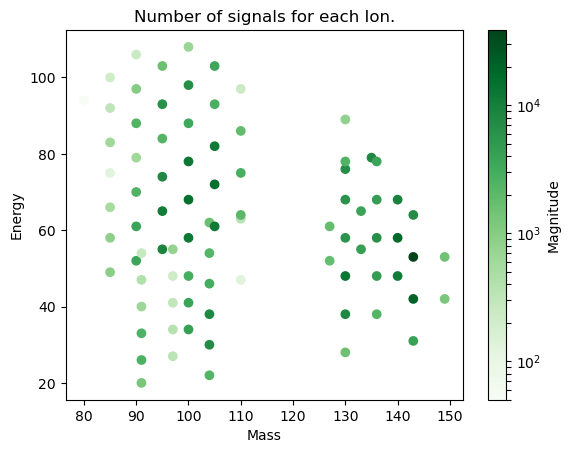

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LogLocator
import pandas as pd
import pathlib

binaries = pathlib.Path('C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector97/Filtered/Unnormalized')
files = list(binaries.iterdir())

E = []
M = []
Magnitude = []

for file in files:
    df = pd.read_hdf(file, key=None, mode='r')
    E.append(int(df['Z'][0]))
    M.append(int(df['A'][0]))
    Magnitude.append(len(df))

# Scatter plot for Magnitude
plt.figure()
scatter_magnitude = plt.scatter(M, E, c=Magnitude, cmap='Greens',
                                norm=colors.LogNorm())
plt.colorbar(scatter_magnitude, label='Magnitude', ticks=LogLocator(subs=range(10)))
plt.xlabel('Mass')
plt.ylabel('Energy')
plt.title('Number of signals for each Ion.')
plt.show()

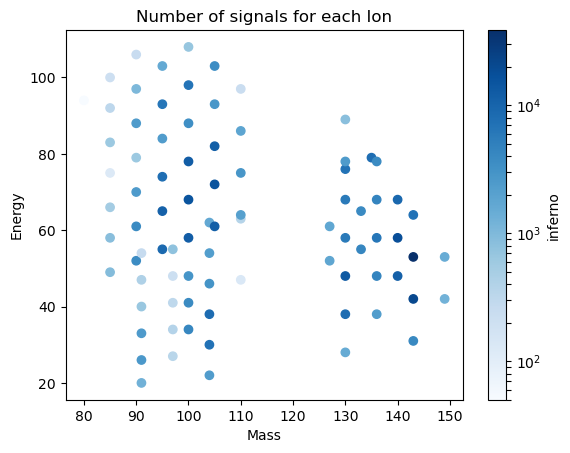

In [26]:
# Scatter plot for Magnitude
plt.figure()
scatter_magnitude = plt.scatter(M, E, c=Magnitude, cmap='Blues',
                                norm=colors.LogNorm())
plt.colorbar(scatter_magnitude, label='inferno', ticks=LogLocator(subs=range(10)))
plt.xlabel('Mass')
plt.ylabel('Energy')
plt.title('Number of signals for each Ion')
plt.show()

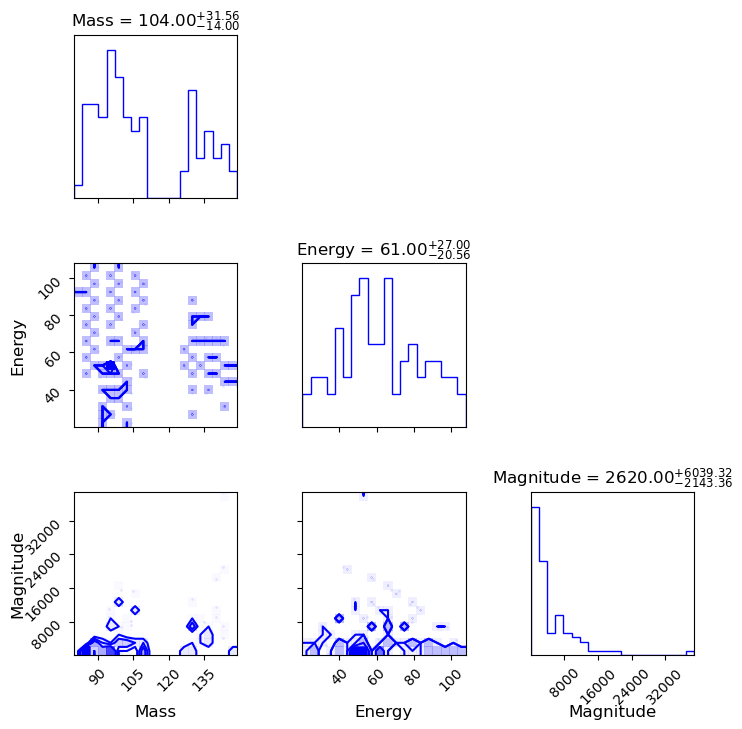

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import LogLocator
import pandas as pd
import pathlib
import corner
from matplotlib.collections import PathCollection

binaries = pathlib.Path('C:/Users/steve/OneDrive/Bureaublad/Studies/Thesis/Data/Detector97/Filtered/Unnormalized')
files = list(binaries.iterdir())

E = []
M = []
Magnitude = []

for file in files:
    df = pd.read_hdf(file, key=None, mode='r')
    E.append(int(df['Z'][0]))
    M.append(int(df['A'][0]))
    Magnitude.append(len(df))

M = np.array(M)
E = np.array(E)
Magnitude = np.array(Magnitude)

data = np.vstack((M, E, Magnitude)).T

colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'cool', 'coolwarm', 'hot', 'jet',
             'Greens', 'Blues', 'Reds', 'Oranges', 'Purples', 'YlOrBr', 'YlGnBu', 'RdYlBu', 'Pastel1']

# Create a scatter plot matrix using corner
figure = corner.corner(data, labels=['Mass', 'Energy', 'Magnitude'],
                       color='blue', label_kwargs={"fontsize": 12},
                       show_titles=True, title_kwargs={"fontsize": 12})

# Customize the color of scatter points
scatter_points = figure.get_children()
for i, point in enumerate(scatter_points):
    if isinstance(point, PathCollection):
        point.set_array(Magnitude)
        point.set_cmap(colormaps[i % len(colormaps)])
        point.set_norm(colors.LogNorm())

# Adjust the spacing between subplots
figure.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the corner plot
plt.show()